In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

In [2]:
spreadsheet='1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s'
df=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{spreadsheet}/export?format=csv")

In [3]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.shape

(46608, 16)

In [5]:
df.columns.values

array(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget',
       'lease', 'movein', 'source', 'source_city', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country', 'room_type',
       'lead_id'], dtype=object)

In [6]:
df.describe()

,Unnamed: 0
count,46608.00000
mean,23303.50000
std,13454.71501
min,0.00000
25%,11651.75000
50%,23303.50000
75%,34955.25000
max,46607.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [8]:
df.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

status
CONTACTED       0.060076
IMPORTANT       0.002146
LOST           92.782355
OPPORTUNITY     0.544971
PROCESSING      0.017164
WON             6.593289
Name: status, dtype: float64


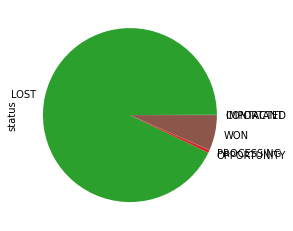

In [11]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('status')['status'].count()/df['status'].count()) *100)
((df.groupby('status')['status'].count()/df['status'].count()) *100).plot.pie()

In [12]:
# Checking the correlation
corr = df.corr()
corr

,Unnamed: 0
Unnamed: 0,1.0


In [13]:
df['status'].unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

In [20]:
df=df.drop(df.index[df['status'].isin(['OPPORTUNITY','CONTACTED','PROCESSING','IMPORTANT'])])
df

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47

In [21]:
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

status
LOST    93.365287
WON      6.634713
Name: status, dtype: float64


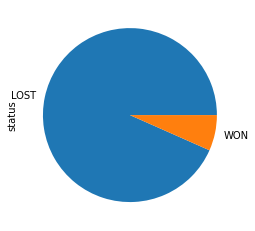

In [22]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('status')['status'].count()/df['status'].count()) *100)
((df.groupby('status')['status'].count()/df['status'].count()) *100).plot.pie()

In [30]:
X= df[['WON','LOST']]
y=df['status']

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split()